## **Importing the libraries**

In [326]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')
from collections import Counter

## **Loading the dataset**

In [327]:
df = pd.read_csv(r"C:\Users\Darsini\Downloads\creditcard_csv.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [329]:
df = df.head(10000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [330]:
df = df.drop(['Time'], axis=1)

Fraudulent transactions: 0.38%

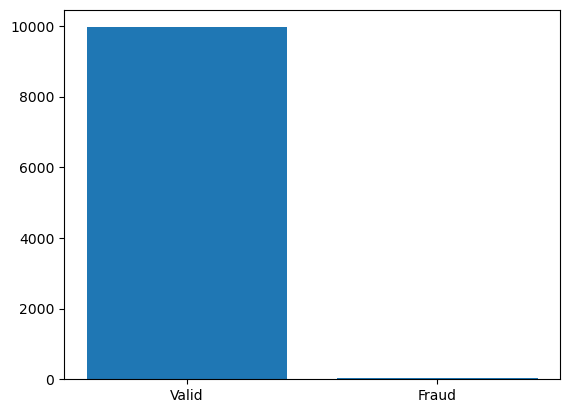

In [331]:
plt.bar(['Valid','Fraud'],list(df['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= df['Class'].value_counts()[1]/sum(df['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

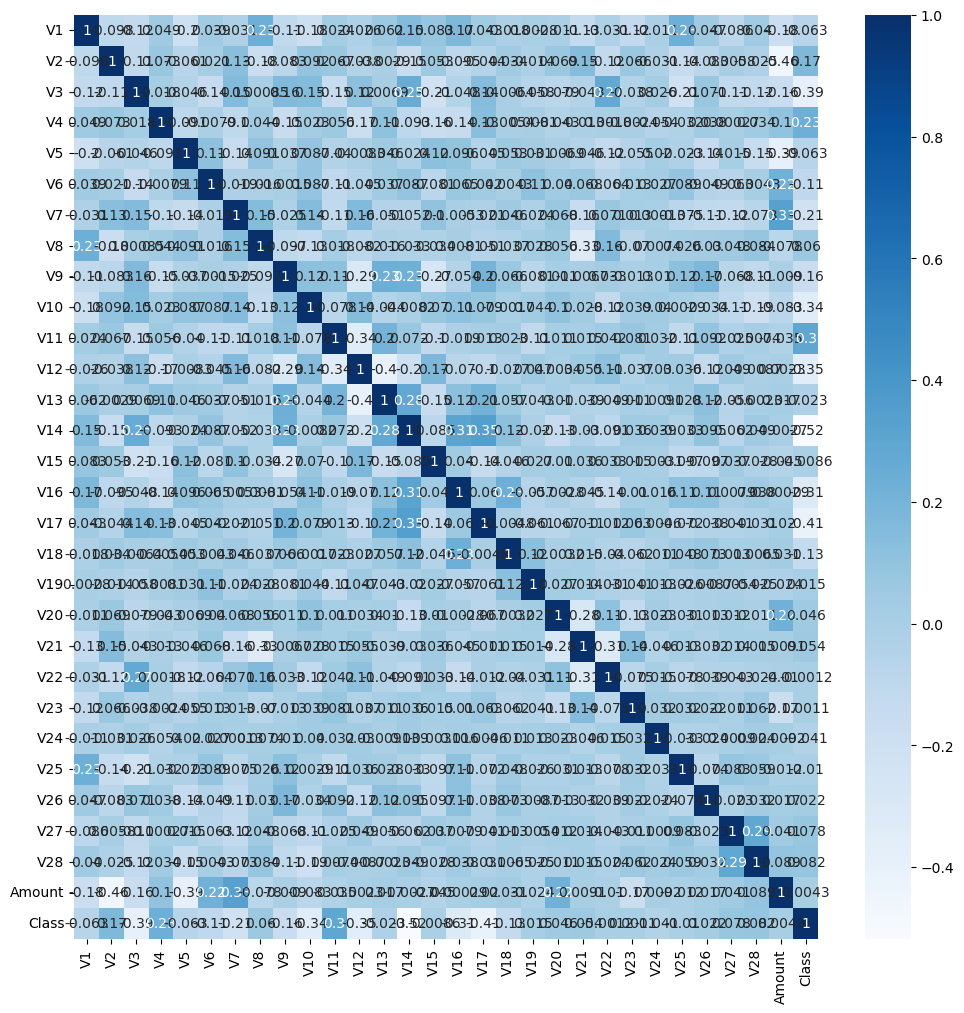

In [332]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df.corr(), annot = True,cmap='Blues')
plt.show()

## **Check for missing values**

In [333]:
# check for null values
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## **Check for categorical variables**

In [334]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O'] # Saving CATEGORICAL Variables
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [335]:
# dividing the x and the y from the dataset
x = df.iloc[:,:-1]
y = df['Class']
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
X = x.values
Y = y.values
print(np.unique(y))

[0 1]


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5500, 29)
(4500, 29)
(5500,)
(4500,)


## **Performing KNN Classification**

In [337]:
def distance_ecu(X_train, X_test):
    """Input:
           - X_train: corresponding to the training data
           - X_test: corresponding to the test point
           
       Output:
           - distances: The distances between the the test point and each point in the training data."""

    distances = []
    for row in range(len(X_train)): ## Loop over the rows of X train 
        current_train_point = X_train[row] # Get them point by point 
        current_distance = 0 #initialize the distance by zero
        
        for col in range(len(current_train_point)): ## Loop over the columns of the row
            current_distance += (current_train_point[col] - X_test[col])**2
            # Or current_distance = current_distance + (X_train[i] - X_test[i])**2)
        current_distance = np.sqrt(current_distance)
        
        distances.append(current_distance) ## Append the distances !
        
    # Store distances in a dataframe
    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances

In [338]:
def nearest_neighbors(distance_point, K):
    """Input:
        - distance_point: The distances between the the test point and each point in the training data.
        - K: The number of neighbors
        
        Output:
        - df_nearest The nearest K neighbors between the test point and the training data"""
    
    # Sort distances using the sort_values function
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    
    ## Take only the first K neighbors
    df_nearest = df_nearest[:K]
    return df_nearest

In [339]:
def voting(df_nearest, y_train):
    """Input:
            - df_nearest: Dataframe contains the nearest K neighbors between the Full training dataset and the t 
            - y_train: The labels of the training dataset
            
        Output:
            - y_pred : The prediction based on Majority Voting"""
    
    ## Use the Counter object to get the labels with K nearest neighbors 
    counter_vote = Counter(y_train[df_nearest.index])
    y_pred = counter_vote.most_common()[0][0] ## Majority Voting !
    
    return y_pred

In [340]:
def KNN_from_scratch(X_train, y_train, X_test, K):
    """Input:
            - X_train: The full training dataset
            - y_train: The labels of the training dataset
            - X_test: The full test dataset
            - K: The number of neighbors
            
        Output:
            - y_pred: The prediction for the whole test set based on Majority Voting"""
    
    y_pred = []
    
    ## Loop over all the test set and perform the three steps
    
    for X_test_point in X_test:       
        distance_point = distance_ecu(X_train, X_test_point) ## Step 1
        df_nearest_point = nearest_neighbors (distance_point, K) ## step 2 
        y_pred_point = voting(df_nearest_point, y_train) ## Step 3
        y_pred.append(y_pred_point)
        
    return y_pred

In [341]:
y_pred_KNN = KNN_from_scratch(X_train, y_train, X_test, K=3)

In [342]:
print("Accuracy score: ", accuracy_score(y_true=y_test, y_pred=y_pred_KNN))
print("Precision: ", precision_score(y_test, y_pred_KNN, average='macro'))
print("Recall: ", recall_score(y_test, y_pred_KNN, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_KNN, average='macro'))

Accuracy score:  0.9995555555555555
Precision:  0.9997770345596433
Recall:  0.9411764705882353
F1-score:  0.9686384924174843


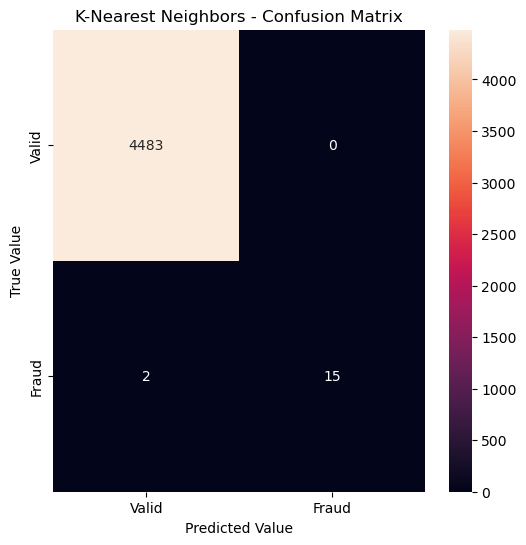

In [343]:
cm_knn = confusion_matrix(y_test, y_pred_KNN)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm_knn, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Nearest Neighbors - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

## **Performing Naive Bayes Algorithm**

In [344]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)

        for c in (self._classes):
            X_c = X[y == c]
            self._mean[c, :] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [345]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy_score(y_test, y_pred_NB))
print("Precision: ", precision_score(y_test, y_pred_NB, average='macro'))
print("Recall: ", recall_score(y_test, y_pred_NB, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_NB, average='macro'))

Naive Bayes classification accuracy 0.9911111111111112
Precision:  0.6491228070175439
Recall:  0.9955387017622128
F1-score:  0.7274890844238817


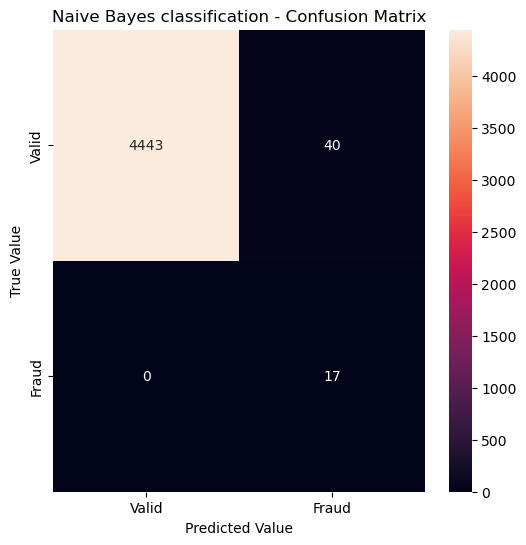

In [325]:
cm_nb = confusion_matrix(y_test, y_pred_NB)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm_nb, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Naive Bayes classification - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()